# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In the introductory project, you studied the Titanic survival data, and you were able to make predictions about passenger survival. In that project, you built a decision tree by hand, that at each stage, picked the features that were most correlated with survival. Lucky for us, this is exactly how decision trees work! In this lab, we'll do this much quicker by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

Recall that these are the various features present for each passenger on the ship:
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)  
- (Target variable) **Survived**: Outcome of survival (0 = No; 1 = Yes)  



In [1]:
# Import libraries necessary for this project
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('titanic_data.csv')
# Print the first few entries of the Titanic data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# define variables(features, outcomes)
#Note: do not include Name column with features 
features = df.drop(['Survived','Name','PassengerId'], axis=1)
outcomes = df.Survived

# Show the new dataset with 'Survived' removed
features.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#data exploration:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
#data cleaning: fill null values with zero
features.Age.fillna(0, inplace=True)
features.Cabin.fillna(0, inplace=True)
features.Embarked.fillna(0, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


## Preprocessing the data


In [37]:
#transformation: Perform feature scaling on the data
# first: define the standardization scaling object using StandardScaler().
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num = ['Pclass','Age','SibSp','Parch','Fare']
# second: apply the scaler to the numerical columns on the data:
features[num] = scaler.fit_transform(features[num])
features.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,male,-0.102313,0.432793,-0.473674,A/5 21171,-0.502445,0,S
1,-1.566107,female,0.807492,0.432793,-0.473674,PC 17599,0.786845,C85,C
2,0.827377,female,0.125138,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,0,S
3,-1.566107,female,0.636903,0.432793,-0.473674,113803,0.420730,C123,S
4,0.827377,male,0.636903,-0.474545,-0.473674,373450,-0.486337,0,S


we'll one-hot encode the features.

In [38]:
#dummies variables: convert catogrical columns to numerical
## perform one-hot encoding on categorical columns Using pandas.get_dummies()
features = pd.get_dummies(features)

In [39]:
features.shape

(891, 840)

## Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [40]:
#split the data to two sets. training set and testing set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [41]:
# Define the classifier model as DecisionTree
from sklearn.tree import DecisionTreeClassifier

#fit the model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

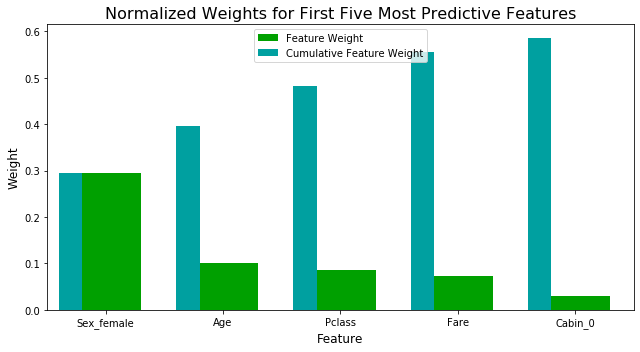

In [42]:
import visuals as vs
vs.feature_plot(model.feature_importances_, X_train, y_train)

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [43]:
# Making predictions on scaling data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9985955056179775
The test accuracy is 0.8268156424581006


# Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth` The maximum number of levels in the tree.
- `min_samples_leaf` The minimum number of samples allowed in a leaf.
- `min_samples_split` The minimum number of samples required to split an internal node.



use Grid Search!



In [44]:
#grid search
#import gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#define the classifier model by DecisionTree
clf = DecisionTreeClassifier()

#define the parameters:
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = [{'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}]

#define the score method using make_scorer()
scorer = make_scorer(accuracy_score)

#define gridsearchcv function with cv=3 (so cross validation=3)
grid_obj = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = scorer,
                           cv = 3)
#fit/ train the function/ object
grid_fit = grid_obj.fit(X_train, y_train)
#get the best estimtor model
best_clf = grid_fit.best_estimator_


In [45]:
# Make predictions using the new model.
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8623595505617978
The test accuracy is 0.8547486033519553
